In [1]:
import numpy as nmp
import matplotlib.pyplot as plt
import time
import scipy.stats as sts
%matplotlib inline

# в этой задаче нам этот параметр не известен
_lambda = 1/45 # ~pois(1/lambda(t-s))
t_0 = 100 # с такой периодичностью выводятся уточненные данные (в секундах)
t = 50000 # рассматриваем до этого момента

file = open('6.csv', 'r') # файл немного изменен(прикреплен) - удалены первые три строчки (_lambda, t_0, t)
failed_servers = []

# считываем данные из файла
for line in file:
    for value in line.split():
        failed_servers.append(float(value))
        
alpha = 1
beta = 0.5

Вывод формулы для условного математического ожидания:
$E(N_t|N_s) = E(N_t - N_s + N_s|N_s) = E(N_t - N_s) + E(N_s|N_s) = E(N_t|N_s) + N_s = \lambda*(t - s) + N_s$

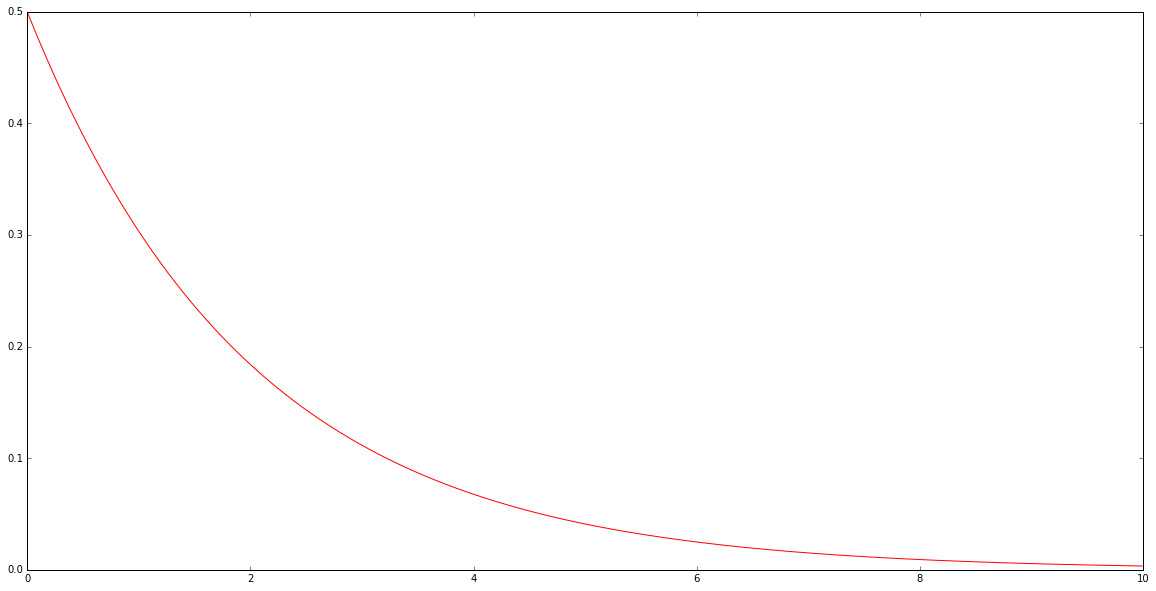

In [4]:
axis_x = nmp.arange(0, 10, 0.01)

# строим график плотности гамма-распределения
fig = plt.figure(figsize=(20, 10))
plt.plot(axis_x, sts.gamma.pdf(axis_x, alpha, scale=1/beta), '-r')

plt.axis([0, 10, 0, 0.5])
plt.show()

Сопряженное к экспоненциальному - гамма-распределение. 

Байесовская оценка: $\lambda = \frac{\alpha + n}{\beta + \Sigma X_i}$

Так как мы ничего о распределении $\lambda$ не знаем, возьмем $\alpha = 1$, иначе при большем значении $\alpha$ появится пик.

Чтобы график был более-менее плавный и равномерный, положим $\beta = 0.5$

(Примеры графиков с различными параметрами в конце документа)

In [25]:
events= [(t, 1) for t in failed_servers] + [(i, 0) for i in range(len(failed_servers))] 
events.sort()

# вызываем, когда появляется новая информация и нужно сделать переоценку
def estimation(l, s):
    return ((alpha + l - 1) / (s + beta))

# у меня не получилось сделать, чтобы это все работало каждые 100 секунд... поэтому как-то так
# можно вывести все данные, но выведем только первые 100, чтобы продемонстрировать работу алгоритма
_time = 0
X = []
for sec in (events[:100]):
    s = sec[0]
    time.sleep(s - _time)
    if sec[1]:
        print('%.3f break' % s)
        X.append(s - nmp.sum(X))
    else:
        # поступила новая информация - переоцениваем
        lmbd = estimation(len(X), nmp.sum(X))
        print('%.3f %.3f' % (s, lmbd * (t - s) + len(X)))
    _time = s

0.000 0.000
1.000 0.000
2.000 0.000
3.000 0.000
4.000 0.000
5.000 0.000
6.000 0.000
7.000 0.000
8.000 0.000
9.000 0.000
10.000 0.000
11.000 0.000
12.000 0.000
13.000 0.000
14.000 0.000
14.254 break
15.000 3388.803
16.000 3388.735
17.000 3388.667
18.000 3388.600
19.000 3388.532
19.154 break
20.000 5088.013
21.000 5087.912
22.000 5087.810
23.000 5087.708
24.000 5087.606
25.000 5087.505
26.000 5087.403
27.000 5087.301
28.000 5087.199
29.000 5087.098
30.000 5086.996
30.396 break
31.000 4855.019
32.000 4854.922
33.000 4854.825
34.000 4854.727
35.000 4854.630
36.000 4854.533
37.000 4854.436
38.000 4854.339
39.000 4854.242
40.000 4854.145
41.000 4854.048
42.000 4853.951
43.000 4853.854
44.000 4853.756
45.000 4853.659
46.000 4853.562
47.000 4853.465
48.000 4853.368
49.000 4853.271
50.000 4853.174
51.000 4853.077
52.000 4852.980
53.000 4852.883
54.000 4852.785
55.000 4852.688
56.000 4852.591
57.000 4852.494
58.000 4852.397
59.000 4852.300
60.000 4852.203
61.000 4852.106
62.000 4852.009
63.000 4

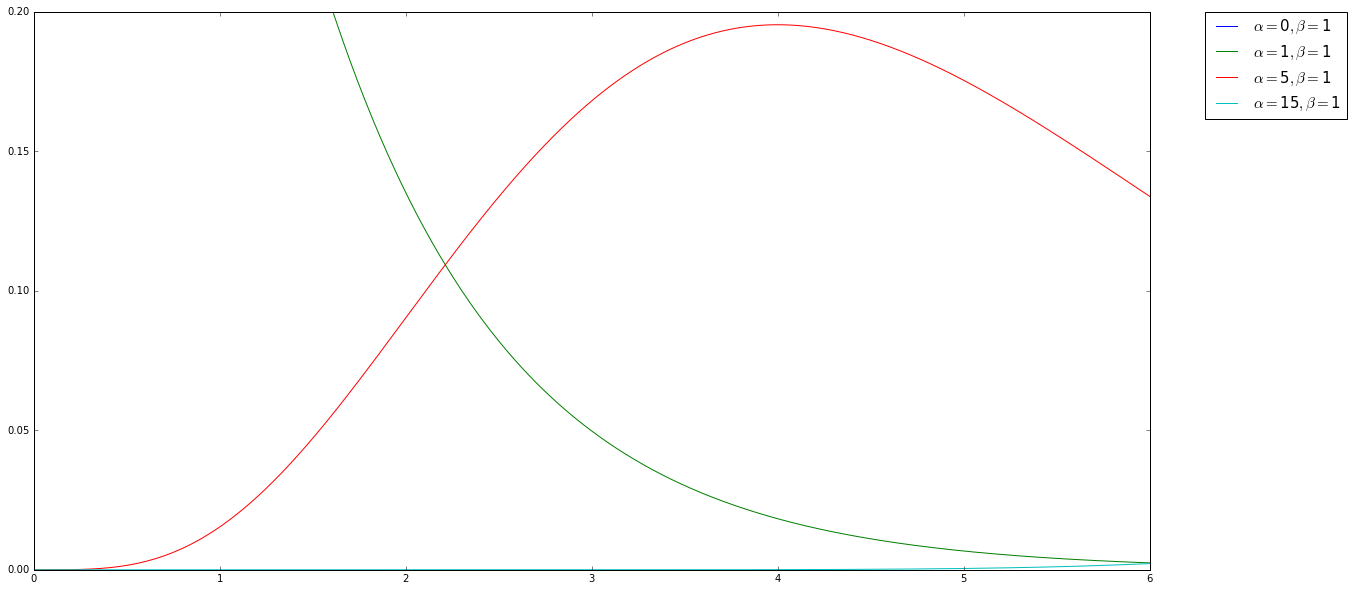

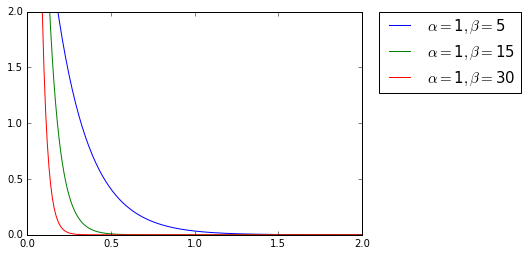

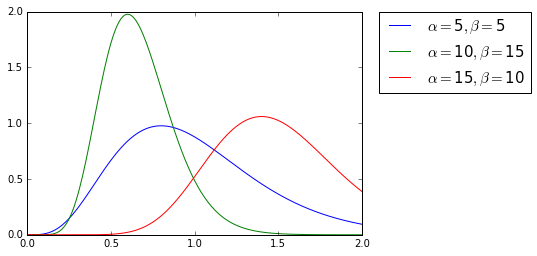

In [17]:
# попробуем разные параметры для гамма-распределения:

axis_x = nmp.arange(0, 10, 0.01)

def graph(alpha, beta):
       plt.plot(axis_x, sts.gamma.pdf(axis_x, alpha, scale=1/beta), label = r'$\alpha = $'+str(alpha)+r'$, \beta = $' + str(beta))

# строим график плотности гамма-распределения
fig = plt.figure(figsize=(20, 10))

# меняем первый параметр
graph(0, 1)
graph(1, 1)
graph(5, 1)
graph(15, 1)

plt.axis([0, 6, 0, 0.2])
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, prop={'size':15}, borderaxespad = 0.)
plt.show()

# меняем второй параметр
graph(1, 5)
graph(1, 15)
graph(1, 30)

plt.axis([0, 2, 0, 2])
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, prop={'size':15}, borderaxespad = 0.)
plt.show()

# меняем оба параметра
graph(5, 5)
graph(10, 15)
graph(15, 10)

plt.axis([0, 2, 0, 2])
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, prop={'size':15}, borderaxespad = 0.)
plt.show()

Вывод и выбранные параметры написаны выше.